In [1]:
import os
import sys
import math
import torch
import pydriller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydriller import Repository

In [2]:

def clean_lines(lines):
    # Remove blank lines and strip whitespace
    return [line.strip() for line in lines if line.strip()]

def get_diff(mf):
    if mf.diff is None:
        return ""
    lines = mf.diff.splitlines()
    return "\n".join(clean_lines(lines))

def create_consolidated_df(repo_urls):
    files_list = []
    for repo_url in repo_urls:
        for commit in Repository(repo_url, skip_whitespaces=True).traverse_commits():
            parent_sha = commit.parents[0] if commit.parents else ""
            for mf in commit.modified_files:
                files_list.append([
                    mf.old_path or "",
                    mf.new_path or "",
                    commit.hash,
                    parent_sha,
                    commit.msg,
                    get_diff(mf)
                ])
    df = pd.DataFrame(files_list, columns=[
        "old_file_path", "new_file_path", "commit_sha", "parent_commit_sha",
        "commit_message", "diff_myers"
    ])
    hist_diff = []
    for repo_url in repo_urls:
        for commit in Repository(repo_url, histogram_diff=True, skip_whitespaces=True).traverse_commits():
            parent_sha = commit.parents[0] if commit.parents else ""
            for mf in commit.modified_files:
                hist_diff.append(get_diff(mf))
    df["diff_hist"] = pd.Series(hist_diff)
    return df


In [ ]:
repo_urls = [
    "https://github.com/Kludex/starlette",
    "https://github.com/huggingface/trl",
    "https://github.com/huggingface/peft"
]

# consolidated_df = pd.read_csv("csv_files\lab_4\consolidated_repo_data.csv")
consolidated_df = create_consolidated_df(repo_urls)
consolidated_df.to_csv("csv_files\lab_4\consolidated_repo_data.csv",
                       index=False)
print("Saved consolidated_repo_data.csv")
display(consolidated_df.tail())

Saved consolidated_repo_data.csv


,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist
15124,tests/test_lora_variants.py,tests/test_lora_variants.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -22,13 +22,18 @@ from peft.tuners.lora.laye...","@@ -22,13 +22,18 @@ from peft.tuners.lora.laye..."
15125,tests/testing_common.py,tests/testing_common.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -586,10 +586,15 @@ class PeftCommonTester:\...","@@ -586,10 +586,15 @@ class PeftCommonTester:\..."
15126,docs/source/developer_guides/lora.md,docs/source/developer_guides/lora.md,de60e88b6bd98c8fc2060682099e6b9108e14210,293aea5df6db240856a77f89955d1a89ce38b50d,Fix missing code start in docs (#2768)\n\nTher...,"@@ -248,7 +248,10 @@ output = model_alora.gene...","@@ -248,7 +248,10 @@ output = model_alora.gene..."
15127,tests/test_gpu_examples.py,tests/test_gpu_examples.py,2ea5377ee3069fa5aa49ed3930ac52bc706aed85,de60e88b6bd98c8fc2060682099e6b9108e14210,TST FIX Failing AutoAWQ test with torch 2.8 (#...,"@@ -3712,6 +3712,13 @@ class PeftHqqGPUTests(u...","@@ -3712,6 +3712,13 @@ class PeftHqqGPUTests(u..."
15128,src/peft/utils/integrations.py,src/peft/utils/integrations.py,5d97453235d3c3073b059995f56260d364d44e83,2ea5377ee3069fa5aa49ed3930ac52bc706aed85,FIX Deprecated key_cache attribute on Cache pt...,"@@ -179,6 +179,14 @@ def map_cache_to_layer_de...","@@ -179,6 +179,14 @@ def map_cache_to_layer_de..."


In [5]:
df = pd.read_csv("csv_files/lab_4/consolidated_repo_data.csv")
df["Discrepancy"] = np.where(df["diff_myers"] == df["diff_hist"], "No", "Yes")
display(df.tail(10))

df.to_csv("csv_files/lab_4/final_repo_data.csv", index=False)
print("Saved repo_data.csv")

,old_file_path,new_file_path,commit_sha,parent_commit_sha,commit_message,diff_myers,diff_hist,Discrepancy
15119,src/peft/tuners/lora/model.py,src/peft/tuners/lora/model.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -64,6 +64,11 @@ def _adapter_names_pre_forw...","@@ -64,6 +64,11 @@ def _adapter_names_pre_forw...",No
15120,src/peft/tuners/lora/variants.py,src/peft/tuners/lora/variants.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -13,7 +13,9 @@\n# limitations under the Lic...","@@ -13,7 +13,9 @@\n# limitations under the Lic...",No
15121,tests/test_custom_models.py,tests/test_custom_models.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -2099,7 +2099,6 @@ class TestPeftCustomMode...","@@ -2099,7 +2099,6 @@ class TestPeftCustomMode...",No
15122,tests/test_decoder_models.py,tests/test_decoder_models.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -152,6 +152,32 @@ ALL_CONFIGS = [\n""bias"": ...","@@ -152,6 +152,32 @@ ALL_CONFIGS = [\n""bias"": ...",No
15123,tests/test_gpu_examples.py,tests/test_gpu_examples.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -4853,6 +4853,79 @@ class TestEvaInitializa...","@@ -4853,6 +4853,79 @@ class TestEvaInitializa...",No
15124,tests/test_lora_variants.py,tests/test_lora_variants.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -22,13 +22,18 @@ from peft.tuners.lora.laye...","@@ -22,13 +22,18 @@ from peft.tuners.lora.laye...",No
15125,tests/testing_common.py,tests/testing_common.py,293aea5df6db240856a77f89955d1a89ce38b50d,a3197b1ec54baa107e2efc4a30c19209d9ea489a,Support for Activated LoRA (#2609)\n\nThis PR ...,"@@ -586,10 +586,15 @@ class PeftCommonTester:\...","@@ -586,10 +586,15 @@ class PeftCommonTester:\...",No
15126,docs/source/developer_guides/lora.md,docs/source/developer_guides/lora.md,de60e88b6bd98c8fc2060682099e6b9108e14210,293aea5df6db240856a77f89955d1a89ce38b50d,Fix missing code start in docs (#2768)\n\nTher...,"@@ -248,7 +248,10 @@ output = model_alora.gene...","@@ -248,7 +248,10 @@ output = model_alora.gene...",No
15127,tests/test_gpu_examples.py,tests/test_gpu_examples.py,2ea5377ee3069fa5aa49ed3930ac52bc706aed85,de60e88b6bd98c8fc2060682099e6b9108e14210,TST FIX Failing AutoAWQ test with torch 2.8 (#...,"@@ -3712,6 +3712,13 @@ class PeftHqqGPUTests(u...","@@ -3712,6 +3712,13 @@ class PeftHqqGPUTests(u...",No
15128,src/peft/utils/integrations.py,src/peft/utils/integrations.py,5d97453235d3c3073b059995f56260d364d44e83,2ea5377ee3069fa5aa49ed3930ac52bc706aed85,FIX Deprecated key_cache attribute on Cache pt...,"@@ -179,6 +179,14 @@ def map_cache_to_layer_de...","@@ -179,6 +179,14 @@ def map_cache_to_layer_de...",No


Saved repo_data.csv


Discrepancy
No     14541
Yes      588
Name: count, dtype: int64


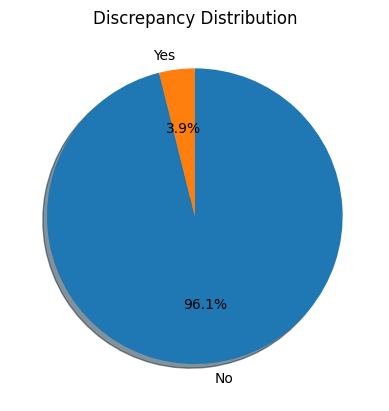

In [6]:
print(df["Discrepancy"].value_counts())
df["Discrepancy"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    shadow=True
)
plt.title(f"Discrepancy Distribution")
plt.ylabel("")
plt.savefig(f"lab4_plots/pie_discrepancy.png")
plt.show()


In [8]:
# filter source code (.py) files
df_source_code_files = df.loc[df["new_file_path"].str.split('.').str[-1] == "py", "Discrepancy"]
# filter test files (starting with "test")
df_test_code_files = df.loc[df["new_file_path"].str[:4] == 'test', "Discrepancy"]
# filter README files (.md)
df_readme_files = df.loc[df["new_file_path"].str.split('.').str[-1] == "md", "Discrepancy"]
# filter LICENSE files (starting with "LICENSE")
df_license_files = df.loc[df["new_file_path"].str[:7] == "LICENSE", "Discrepancy"]

print("Source Code Files (.py):")
display(df_source_code_files.value_counts())

print("Test Code Files (starting with 'test'):")
display(df_test_code_files.value_counts())

print("README Files (.md):")
display(df_readme_files.value_counts())

print("LICENSE Files (starting with 'LICENSE'):")
display(df_license_files.value_counts())

Source Code Files (.py):


Discrepancy
No     10436
Yes      361
Name: count, dtype: int64

Test Code Files (starting with 'test'):


Discrepancy
No     2502
Yes     112
Name: count, dtype: int64

README Files (.md):


Discrepancy
No     1610
Yes      92
Name: count, dtype: int64

LICENSE Files (starting with 'LICENSE'):


Discrepancy
No    5
Name: count, dtype: int64

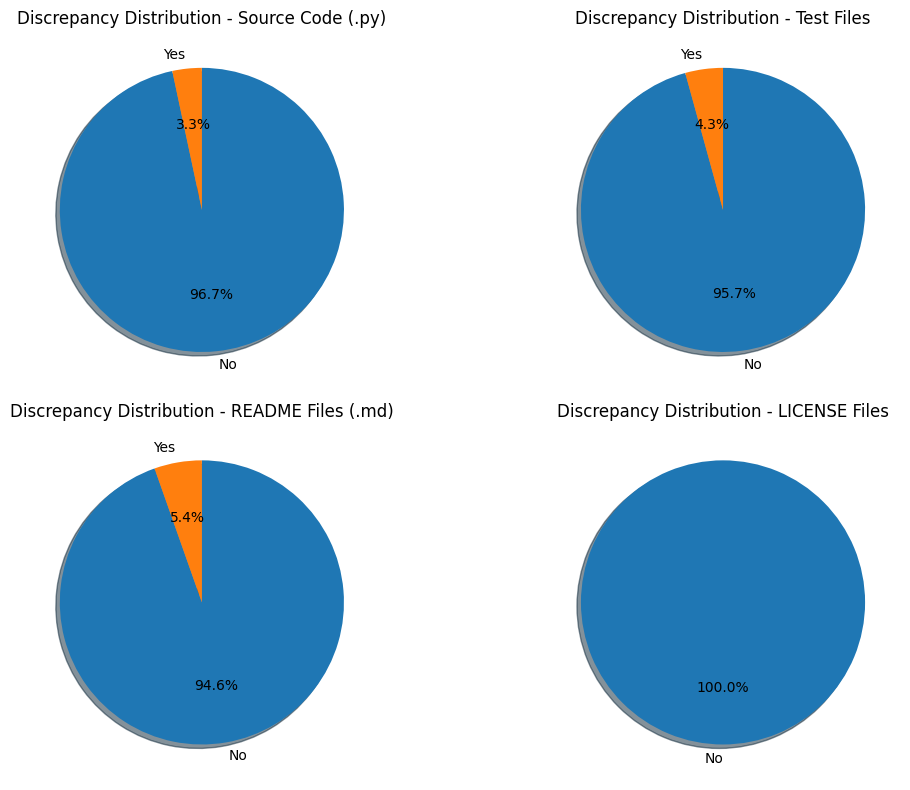

In [11]:
# Create pie charts for each category
categories = {
    "Source Code (.py)": df_source_code_files,
    "Test Files": df_test_code_files,
    "README Files (.md)": df_readme_files,
    "LICENSE Files": df_license_files
}

# for i, (title, data) in enumerate(categories.items(), 1):
#     plt.figure(i)
#     data.value_counts().plot.pie(
#         autopct='%1.1f%%',
#         startangle=90,
#         counterclock=False,
#         shadow=True
#     )
#     plt.title(f"Discrepancy Distribution - {title}")
#     plt.ylabel("")  # remove y-label
#     plt.savefig(f"lab4_plots/pie_discrepancy_{title}.png")
#     plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
axes = axes.ravel()

for ax, (title, data) in zip(axes, categories.items()):
    data.value_counts().plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        shadow=True
    )
    ax.set_title(f"Discrepancy Distribution - {title}")
    ax.set_ylabel("")

plt.tight_layout()
plt.savefig("lab4_plots/pie_discrepancy_all.png")
plt.show()


